

<center>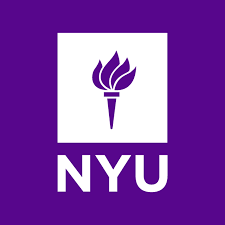</center>

___


<center>Data Science 4 Everyone 🚀</center>
<center><img src="https://www.sportsvideo.org/wp-content/uploads/2022/01/qatar2022-832x447-1.jpeg" width=300 height=350 /></center>


___

## 💾 Data¶

We are going to analyse the FIFA 2023 World Cup dataset. Since The World cup is one othe most important event which happens in our World, Every four years.

Exploring what makes team to successful in the FIFA World Cup 2022. Looking at things like how many goal attempts, how many goals they scored, applied defensive effor and other factors. Finding insights to help coaches make teams better for their next big matchtes and tournament.

The entire FIFAWorldCup data contains the Following below columns:

'team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
       'central channel team2', 'right inside channel team1',
       'right inside channel team2', 'right channel team1',
       'right channel team2', 'total offers to receive team1',
       'total offers to receive team2', 'inbehind offers to receive team1',
       'inbehind offers to receive team2', 'inbetween offers to receive team1',
       'inbetween offers to receive team2', 'infront offers to receive team1',
       'infront offers to receive team2',
       'receptions between midfield and defensive lines team1',
       'receptions between midfield and defensive lines team2',
       'attempted line breaks team1', 'attempted line breaks team2',
       'completed line breaksteam1', 'completed line breaks team2',
       'attempted defensive line breaks team1',
       'attempted defensive line breaks team2',
       'completed defensive line breaksteam1',
       'completed defensive line breaks team2', 'yellow cards team1',
       'yellow cards team2', 'red cards team1', 'red cards team2',
       'fouls against team1', 'fouls against team2', 'offsides team1',
       'offsides team2', 'passes team1', 'passes team2',
       'passes completed team1', 'passes completed team2', 'crosses team1',
       'crosses team2', 'crosses completed team1', 'crosses completed team2',
       'switches of play completed team1', 'switches of play completed team2',
       'corners team1', 'corners team2', 'free kicks team1',
       'free kicks team2', 'penalties scored team1', 'penalties scored team2',
       'goal preventions team1', 'goal preventions team2', 'own goals team1',
       'own goals team2', 'forced turnovers team1', 'forced turnovers team2',
       'defensive pressures applied team1',
       'defensive pressures applied team2'

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok --quiet
!npm install -g localtunnel

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
updated 1 package in 1.31s


In [ ]:
!pip install hvplot --quiet
!pip install install psutil py-cpuinfo
!pip install codecarbon
!pip freeze > requirements.txt

  Using cached codecarbon-2.3.4-py3-none-any.whl (181 kB)
  Using cached arrow-1.3.0-py3-none-any.whl (66 kB)
  Using cached pynvml-11.5.0-py3-none-any.whl (53 kB)
  Using cached rapidfuzz-3.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.4 MB)
  Using cached types_python_dateutil-2.8.19.20240106-py3-none-any.whl (9.7 kB)


In [ ]:
!curl ipecho.net/plain

34.106.16.32

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load image
image_quatar2022 = Image.open('quatar2022.jpeg')

# Title
st.title("FIFA World Cup 2022 Data Analysis")

# Sidebar
st.sidebar.header("Dashboard")
st.sidebar.markdown("---")
app_mode = st.sidebar.selectbox('Select Page', ['Introduction', 'Visualization', 'Prediction'])

# Introduction Page
if app_mode == 'Introduction':
    st.sidebar.subheader("Introduction")
    st.sidebar.markdown("The FIFA World Cup is one of the most anticipated events in the world of sports, bringing together nations to compete for glory on the global stage. In this dashboard, we explore data from the FIFA World Cup 2022, focusing on various aspects of the tournament.")

    st.image(image_quatar2022, width=800)

    st.markdown("### Introduction")
    st.markdown("The FIFA World Cup is one of the most anticipated events in the world of sports, bringing together nations to compete for glory on the global stage. In this dashboard, we explore data from the FIFA World Cup 2022, focusing on various aspects of the tournament.")

    # Objectives
    st.markdown("### Objectives")
    st.markdown("Our objective is to analyze key factors influencing team performance and outcomes in the FIFA World Cup 2022. By examining features such as possession, num of goals scores, corners, and more, we aim to uncover insights that can aid in understanding team dynamics and strategies, those insights may be then essential for coaches while they are preparing the team for the next World Cup tournament or other tournament.")

    # Key Variables
    st.markdown("### Key Variables")
    st.markdown("In our analysis, we focus on the following key variables:")
    st.markdown("- Team")
    st.markdown("- Possession")
    st.markdown("- Number of Goals")
    st.markdown("- Corners")
    st.markdown("- On Target Attempts")
    st.markdown("- Defensive Pressures Applied")

    # Description of Data
    st.markdown("### Description of Data")
    st.markdown("Let's take a look at some descriptive statistics of the data:")

    # Load data
    df2 = pd.read_csv("FIFAWorldCup2022.csv")

    # Display summary statistics
    st.dataframe(df2.describe())

    # Missing Values
    st.markdown("### Missing Values")
    st.markdown("Let's examine the presence of missing values in our dataset:")

    # Calculate percentage of missing values for each column
    missing_values = df2.isnull().sum() / len(df2) * 100

    # Display missing value percentages
    st.write("Percentage of missing values for each column:")
    st.write(missing_values)

    # Assess overall completeness of the dataset
    completeness_ratio = df2.notnull().sum().sum() / (len(df2) * len(df2.columns))
    st.write(f"Overall completeness ratio: {completeness_ratio:.2f}")

    if completeness_ratio >= 0.85:
        st.success("The dataset has a high level of completeness, providing us with reliable data for analysis.")
    else:
        st.warning("The dataset has a low level of completeness, which may affect the reliability of our analysis.")

    # Conclusion
    st.markdown("### Conclusion")
    st.markdown("In this dashboard, we explored the FIFA World Cup 2022 dataset and analyzed key variables related to team performance. By understanding the dynamics of possession, goals, corners, and defensive pressures applied, we gained insights into the factors influencing team success in the tournament. Those insights which are essential for coaches and players to knowwhile they are preparing the team for their next World Cup tournament or other tournament.")

# Visualization Page
elif app_mode == 'Visualization':
    st.sidebar.subheader("Visualization")
    st.sidebar.markdown("Explore visualizations of the FIFA World Cup 2022 data.")

    # Load the FIFA World Cup 2022 dataset
    df2 = pd.read_csv('FIFAWorldCup2022.csv')

    # Encode categorical variables if needed
    encoder = LabelEncoder()
    df2['team1_encoded'] = encoder.fit_transform(df2['team1'])
    df2['team2_encoded'] = encoder.fit_transform(df2['team2'])

    # Remove the percentage sign and convert to float
    df2['possession team1'] = df2['possession team1'].str.rstrip('%').astype(float) / 100

    # Set title
    st.title("FIFA World Cup 2022 Data Analysis - Visualization")

    # Display the dataframe
    st.write(df2)

    # Scatter plot of On Target Attempts vs Number of Goals
    st.subheader('Scatter Plot of On Target Attempts vs Number of Goals for Team 1')
    fig_scatter1, ax_scatter1 = plt.subplots()
    sns.scatterplot(data=df2, x='on target attempts team1', y='number of goals team1', ax=ax_scatter1)
    plt.xlabel('On Target Attempts By Team 1')
    plt.ylabel('Number of Goals Scored by Team 1')
    plt.title('On Target Attempts vs Number of Goals By Team 1')
    st.pyplot(fig_scatter1)

    # Scatter plot of Defensive Pressures vs Number of Goals
    st.subheader('Scatter Plot of Defensive Pressures vs Number of Goals for Team 1')
    fig_scatter2, ax_scatter2 = plt.subplots()
    sns.scatterplot(data=df2, x='defensive pressures applied team1', y='number of goals team1', ax=ax_scatter2)
    plt.xlabel('Defensive Pressures Applied By Team 1')
    plt.ylabel('Number of Goals Scored by Team 1')
    plt.title('Defensive Pressures vs Number of Goals By Team 1')
    st.pyplot(fig_scatter2)

    # Box plot of Number of Goals by Possession
    st.subheader('Box Plot of Number of Goals by Possession for Team 1')
    fig_box, ax_box = plt.subplots()
    sns.boxplot(data=df2, x='possession team1', y='number of goals team1', ax=ax_box)
    plt.xlabel('Possession of Team 1')
    plt.ylabel('Number of Goals Scored by Team 1')
    plt.title('Box Plot of Number of Goals by Possession for Team 1')
    st.pyplot(fig_box)

    # Histogram of Number of Goals
    st.subheader('Histogram of Number of Goals Scored by Team 1')
    fig_hist, ax_hist = plt.subplots()
    sns.histplot(df2['number of goals team1'], bins=10, kde=True, ax=ax_hist)
    plt.xlabel('Number of Goals Scored by Team 1')
    plt.ylabel('Frequency')
    plt.title('Histogram of Number of Goals Scored by Team 1')
    st.pyplot(fig_hist)

    # Distribution plot of Number of Goals
    st.subheader('Distribution Plot of Number of Goals Scored by Team 1')
    fig_dist, ax_dist = plt.subplots()
    sns.kdeplot(df2['number of goals team1'], ax=ax_dist)
    plt.xlabel('Number of Goals Scored by Team 1')
    plt.ylabel('Density')
    plt.title('Distribution Plot of Number of Goals Scored by Team 1')
    st.pyplot(fig_dist)


# Prediction Page
elif app_mode == 'Prediction':
    st.sidebar.subheader("Prediction")
    st.sidebar.markdown("Predict outcomes using machine learning models.")

    # Load the dataset
    df2 = pd.read_csv('FIFAWorldCup2022.csv')

    from sklearn.preprocessing import LabelEncoder

    # Assuming df2 is your DataFrame and 'team1' is the column you want to convert
    encoder = LabelEncoder()
    df2['team1_encoded'] = encoder.fit_transform(df2['team1'])

    # Now 'team1_encoded' contains the numerical values for the 'team1' column

    encoder = LabelEncoder()
    df2['team2_encoded'] = encoder.fit_transform(df2['team2'])

    # Remove the percentage sign and convert to float
    df2['possession team1'] = df2['possession team1'].str.rstrip('%').astype(float) / 100

    selected_model = st.sidebar.selectbox("Select Model", ["Model 1", "Model 2", "Model 3", "Model 4", "Model 5", "Model 6"])

    if selected_model == 'Model 1':
          st.subheader('Prediction Model 1: Possession of Team 1')
          X = df2[['team1_encoded', 'corners team1', 'on target attempts team1', 'number of goals team1', 'defensive pressures applied team1']]
          y = df2['possession team1']
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
          lin_reg = LinearRegression()
          lin_reg.fit(X_train, y_train)
          y_pred = lin_reg.predict(X_test)
          r2 = r2_score(y_test, y_pred)
          mse = mean_squared_error(y_test, y_pred)

          # Display coefficients
          coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])

          # Display evaluation metrics
          st.subheader('Evaluation Metrics - Model 1')
          st.write(f"Mean Squared Error (MSE): {mse}")
          st.write(f"R-squared Score: {r2}")

          # Display coefficient dataframe
          st.subheader('Coefficients - Model 1')
          st.write(coeff_df)

          interpretation = {
              'Interpretation of Mean Squared Error:': [
                  "Mean Squared Error (MSE) represents the average of the squares of the errors. A lower MSE indicates better model performance."
              ],
              'Interpreting the R-squared score:': [
                  f"The R-squared score of the first model is: {r2}",
                  f"The R-squared score of {round(r2, 4)} suggests that about {round(r2 * 100, 2)} % of the variability in possession of team 1 is explained by the model."
              ],
              'Interpreting the coefficients:': [
                  "Holding all other features fixed, a 1 unit increase in team1_encoded is associated with a slight increase in possession of team1.",
                  "Holding all other features fixed, a 1 unit increase in corners team1 is associated with a small increase in possession of team1.",
                  "Holding all other features fixed, a 1 unit increase in on target attempts team1 is associated with a slight decrease in possession of team1.",
                  "Holding all other features fixed, a 1 unit increase in number of goals team1 is associated with a moderate increase in possession of team1.",
                  "Holding all other features fixed, a 1 unit increase in defensive pressures applied team1 is associated with a slight decrease in possession of team1."
              ]
          }
          st.write(interpretation)


    elif selected_model == 'Model 2':
        st.subheader('Prediction Model 2: On-Target Attempts by Team 1')
        X = df2[['team1_encoded', 'corners team1', 'possession team1', 'number of goals team1', 'defensive pressures applied team1']]
        y = df2['on target attempts team1']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        y_pred = lin_reg.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        # Display coefficients
        coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])

        # Display evaluation metrics
        st.subheader('Evaluation Metrics - Model 2')
        st.write(f"Mean Squared Error (MSE): {mse}")
        st.write(f"R-squared Score: {r2}")

        # Display coefficient dataframe
        st.subheader('Coefficients - Model 2')
        st.write(coeff_df)

        interpretation = {
            'Interpretation of Mean Squared Error:': [
                "Mean Squared Error (MSE) represents the average of the squares of the errors. A lower MSE indicates better model performance."
            ],
            'Interpreting the R-squared score:': [
                f"The R-squared score of the second model is: {r2}",
                f"The R-squared score of {round(r2, 4)} suggests that about {round(r2 * 100, 2)} % of the variability in on-target attempts by team 1 is explained by the model."
            ],
            'Interpreting the coefficients:': [
                "1 unit increase in 'team1_encoded' is associated with a decrease of 0.091277 in on-target attempts by team 1.",
                "1 unit increase in 'corners team1' is associated with an increase of 0.292333 in on-target attempts by team 1.",
                "1 unit increase in 'possession team1' is associated with a decrease of 4.095199 in on-target attempts by team 1.",
                "1 unit increase in 'number of goals team1' is associated with an increase of 0.995584 in on-target attempts by team 1.",
                "1 unit increase in 'defensive pressures applied team1' is associated with a decrease of 0.000755 in on-target attempts by team 1."
            ]
        }
        st.write(interpretation)

    elif selected_model == 'Model 3':
        st.subheader('Prediction Model 3: Number of Goals Scored by Team 1')
        X = df2[['team1_encoded', 'corners team1', 'on target attempts team1', 'possession team1', 'defensive pressures applied team1']]
        y = df2['number of goals team1']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        y_pred = lin_reg.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        # Display coefficients
        coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])

        # Display evaluation metrics
        st.subheader('Evaluation Metrics - Model 3')
        st.write(f"Mean Squared Error (MSE): {mse}")
        st.write(f"R-squared Score: {r2}")

        # Display coefficient dataframe
        st.subheader('Coefficients - Model 3')
        st.write(coeff_df)

        interpretation = {
            'Interpretation of Mean Squared Error:': [
                "Mean Squared Error (MSE) represents the average of the squares of the errors. A lower MSE indicates better model performance."
            ],
            'Interpreting the R-squared score:': [
                f"The R-squared score of the third model is: {r2}",
                f"The R-squared score of {round(r2, 4)} suggests that about {round(r2 * 100, 2)} % of the variability in number of goals scored by team 1 is explained by the model."
            ],
            'Interpreting the coefficients:': [



                "1. team1_encoded: A 1 unit increase in team1_encoded is associated with a slight increase in the number of goals scored by team 1.",

                "2. corners team1: A 1 unit increase in corners team1 is associated with a small decrease in the number of goals scored by team 1.",

                "3. on target attempts team1: A 1 unit increase in on target attempts team1 is associated with a moderate increase in the number of goals scored by team 1.",

                "4. possession team1: A 1 unit increase in possession team1 is associated with a substantial increase in the number of goals scored by team 1.",

                "5. defensive pressures applied team1: A 1 unit increase in defensive pressures applied team1 is associated with a slight increase in the number of goals scored by team 1."

            ]
        }
        st.write(interpretation)

    elif selected_model == 'Model 4':
        st.subheader('Prediction Model 4: Corners Obtained by Team 1')
        X = df2[['team1_encoded', 'on target attempts team1', 'possession team1', 'number of goals team1', 'defensive pressures applied team1']]
        y = df2['corners team1']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        y_pred = lin_reg.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        # Display coefficients
        coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])

        # Display evaluation metrics
        st.subheader('Evaluation Metrics - Model 4')
        st.write(f"Mean Squared Error (MSE): {mse}")
        st.write(f"R-squared Score: {r2}")

        # Display coefficient dataframe
        st.subheader('Coefficients - Model 4')
        st.write(coeff_df)

        interpretation = {
            'Interpretation of Mean Squared Error:': [
                "Mean Squared Error (MSE) represents the average of the squares of the errors. A lower MSE indicates better model performance."
            ],
            'Interpreting the R-squared score:': [
                f"The R-squared score of the fourth model is: {r2}",
                f"The R-squared score of {round(r2, 4)} suggests that about {round(r2 * 100, 2)} % of the variability in corners obtained by team 1 is explained by the model."
            ],
            'Interpreting the coefficients:': [
                "1 unit increase in 'team1_encoded' is associated with an increase of 0.036357 in the number of corners obtained by team 1.",
                "1 unit increase in 'on target attempts team1' is associated with an increase of 0.448589 in the number of corners obtained by team 1.",
                "1 unit increase in 'possession team1' is associated with an increase of 7.911968 in the number of corners obtained by team 1.",
                "1 unit increase in 'number of goals team1' is associated with a decrease of 0.282213 in the number of corners obtained by team 1.",
                "1 unit increase in 'defensive pressures applied team1' is associated with a decrease of 0.005564 in the number of corners obtained by team 1."
            ]
        }
        st.write(interpretation)

    elif selected_model == 'Model 5':
        st.subheader('Prediction Model 5: Defensive Pressures Applied by Team 1')
        X = df2[['team1_encoded', 'on target attempts team1', 'possession team1', 'number of goals team1', 'corners team1']]
        y = df2['defensive pressures applied team1']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        y_pred = lin_reg.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        # Display coefficients
        coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])

        # Display evaluation metrics
        st.subheader('Evaluation Metrics - Model 5')
        st.write(f"Mean Squared Error (MSE): {mse}")
        st.write(f"R-squared Score: {r2}")

        # Display coefficient dataframe
        st.subheader('Coefficients - Model 5')
        st.write(coeff_df)

        interpretation = {
            'Interpretation of Mean Squared Error:': [
                "Mean Squared Error (MSE) represents the average of the squares of the errors. A lower MSE indicates better model performance."
            ],
            'Interpreting the R-squared score:': [
                f"The R-squared score of the fifth model is: {r2}",
                f"The R-squared score of {round(r2, 4)} suggests that about {round(r2 * 100, 2)} % of the variability in defensive pressures applied by team 1 is explained by the model."
            ],
            'Interpreting the coefficients:': [
                "1 unit increase in 'team1_encoded' is associated with an increase of 0.745670 in defensive pressures applied by team 1.",
                "1 unit increase in 'on target attempts team1' is associated with a decrease of 0.734163 in defensive pressures applied by team 1.",
                "1 unit increase in 'possession team1' is associated with a decrease of 625.255207 in defensive pressures applied by team 1.",
                "1 unit increase in 'number of goals team1' is associated with an increase of 10.184720 in defensive pressures applied by team 1.",
                "1 unit increase in 'corners team1' is associated with a decrease of 3.524892 in defensive pressures applied by team 1."
            ]
        }
        st.write(interpretation)

    elif selected_model == 'Model 6':
        st.subheader('Prediction Model 6: Free Kicks Obtained by Team 1')
        X = df2[['team1_encoded', 'on target attempts team1', 'possession team1', 'number of goals team1', 'corners team1', 'defensive pressures applied team1']]
        y = df2['free kicks team1']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        y_pred = lin_reg.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        # Display coefficients
        coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])

        # Display evaluation metrics
        st.subheader('Evaluation Metrics - Model 6')
        st.write(f"Mean Squared Error (MSE): {mse}")
        st.write(f"R-squared Score: {r2}")

        # Display coefficient dataframe
        st.subheader('Coefficients - Model 6')
        st.write(coeff_df)

        interpretation = {
            'Interpretation of Mean Squared Error:': [
                "Mean Squared Error (MSE) represents the average of the squares of the errors. A lower MSE indicates better model performance."
            ],
            'Interpreting the R-squared score:': [
                f"The R-squared score of the sixth model is: {r2}",
                f"The R-squared score of {round(r2, 4)} suggests that about {round(r2 * 100, 2)} % of the variability in free kicks obtained by team 1 is explained by the model."
            ],
            'Interpreting the coefficients:': [
                "1 unit increase in 'team1_encoded' is associated with a decrease of 0.125053 in the number of free kicks obtained by team 1.",
                "1 unit increase in 'on target attempts team1' is associated with a decrease of 0.449737 in the number of free kicks obtained by team 1.",
                "1 unit increase in 'possession team1' is associated with an increase of 11.782279 in the number of free kicks obtained by team 1.",
                "1 unit increase in 'number of goals team1' is associated with an increase of 0.155201 in the number of free kicks obtained by team 1.",
                "1 unit increase in 'corners team1' is associated with a decrease of 0.187196 in the number of free kicks obtained by team 1.",
                "1 unit increase in 'defensive pressures applied team1' is associated with a decrease of 0.001074 in the number of free kicks obtained by team 1."
            ]
        }
        st.write(interpretation)



Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule yargs@17.1.1 ch


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.16.32:8501

npx: installed 22 in 2.446s
your url is: https://dry-chefs-say.loca.lt
  Stopping...
^C
